![](https://i.imgur.com/0AUxkXt.png)

# Assignment 3 - From data to insights

Before you explore the data, write down a short list of what you expect to see in the data: the distribution of key variables, the relationships between important pairs of them, and so on. Such a list is essentially a prediction based on your current understanding of the business.

Now analyze the data. Make plots, do summaries, whatever is needed to see if it matches your expectations.

Is there anything that doesn’t match? Anything that makes you go “That’s odd” or “That doesn’t make any sense.”?

Zoom in and try to understand what in your business is making that weird thing show up in the data like that. This is the critical step.

You may have just found an insight into the business and increased your understanding


## The data analysis checklist

This checklist can be used as a guide during the process of a data analysis, or as a way to evaluate the quality of a reported data analysis.

### Answering the first questions

1. Did you define the metric for success before beginning?
2. Did you understand the context for the question and business application?
3. Did you consider whether the question could be answered with the available data?

### Cleaning the data

1. Did you identify the missing data?
2. Is each variable one column?
3. Do different data types appear in each table?
4. Did you try to identify any errors or miscoding of variables?
5. Did you check for outliers?

### Exploratory analysis

1. Did you make univariate plots (histogram, distplot, boxplot)?
2. Did you consider correlations between variables (scatterplot, jointplot, kde plot, correlation matrix)?
3. Did you check the units of all data points to make sure they are in the right range?

### Presentations

1. Did you lead with a brief, understandable to everyone of your problem?
2. Did you explain the data, describe the question of interest?
3. Did you make sure all legends and axes were legible from the back of the room?

## Dataset - Online Retailes Purchase

Typically e-commerce datasets are proprietary and consequently hard to find among publicly available data. However, [The UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php) has made this dataset containing actual transactions from 2010 and 2011. The dataset is maintained on their site, where it can be found by the title "Online Retail".


### Step 1 - Checking the data

**Import tools set**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

**Import data**

In [2]:
# link = "https://ml101-khanhnguyen.s3-ap-southeast-1.amazonaws.com/devc/Online_Retail.csv"
# Note: set param encoding = 'latin1'
# Your code here
retail = pd.read_csv('https://ml101-khanhnguyen.s3-ap-southeast-1.amazonaws.com/devc/Online_Retail.csv', encoding='latin1')

In [3]:
# Print out First 5 rows from dataframe
# Your code here
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [4]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
n_total = len(retail.InvoiceNo); print(n_total)
n_uni_invoice = len(retail.InvoiceNo.unique()); print(n_uni_invoice)

541909
25900


In [6]:
n_uniques = [[col_name, len(retail[col_name].unique())] for col_name in retail.columns.values]
pd.DataFrame(n_uniques, columns=['Column Name', 'N_unique'])

,Column Name,N_unique
0,InvoiceNo,25900
1,StockCode,4070
2,Description,4224
3,Quantity,722
4,InvoiceDate,23260
5,UnitPrice,1630
6,CustomerID,4373
7,Country,38


### Step 2 - Cleaning the data

Few of useful data cleaning functions:

* `s.astype('category')` # This will convert the datatype of the series to float *Please note that "s" here is a Pandas Series

* `s.replace(1,'one')` # This will replace all values equal to 1 with 'one'

* `s.replace([1,3],['one','three'])` # This will replace all 1 with 'one' and 3 with 'three'

* `data.rename(columns=lambda x: x + 1)` # Mass renaming of columns

* `data.rename(columns={'oldname': 'new name'})` # Selective renaming

* `data.set_index('column_one')` #  This will change the index

* `data.rename(index=lambda x: x + 1)` # Mass renaming of index

* `data.dropna()` # Remove missing values

* `data.fillna(x)` #  This will replaces all null values with x

* `s.fillna(s.mean())` # This will replace all null values with the mean (mean can be replaced with almost any function from the below section) :

* `data.corr()` # This will return the correlation between columns in a DataFrame

* `data.count()` # This will return the number of non-null values in each DataFrame column

* `data.max()` # This will return the highest value in each column

* `data.min()` # This will return the lowest value in each column

* `data.median()` # This will return the median of each column

* `data.std()` # This will returns the standard deviation of each column


**Check for NaN values**

In [7]:
retail.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

**Examine few examples of NaN values**

In [8]:
# List all NaN values
print('Some NaN Description: ')
retail[retail['Description'].isna()].sample(5)

Some NaN Description: 


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
147794,549139,22988,NaN,-91,4/6/11 15:26,0.0,NaN,United Kingdom
521333,580359,20775,NaN,-35,12/2/11 16:11,0.0,NaN,United Kingdom
218794,556069,84226,NaN,-34,6/8/11 14:41,0.0,NaN,United Kingdom
171728,551454,78027,NaN,-3,4/28/11 16:02,0.0,NaN,United Kingdom
108687,545565,47563B,NaN,-10,3/3/11 16:14,0.0,NaN,United Kingdom


In [9]:
print('Some NaN CustomerID: ')
retail[retail['Description'].isna()].sample(5)

Some NaN CustomerID: 


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
80665,543051,79062D,NaN,960,2/3/11 10:15,0.0,NaN,United Kingdom
167141,550981,21911,NaN,1,4/21/11 17:32,0.0,NaN,United Kingdom
280754,561498,21610,NaN,-14,7/27/11 14:10,0.0,NaN,United Kingdom
45150,540252,22198,NaN,-100,1/5/11 16:25,0.0,NaN,United Kingdom
302822,563449,85152,NaN,2,8/16/11 14:28,0.0,NaN,United Kingdom


#### Fillna values:

In [10]:
retail.fillna('None', inplace=True)

In [11]:
retail.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

**Exclude negative Quatity entries**

In [12]:
retail = retail[retail['Quantity'] >= 0]

**Exclude negative Price entries**

In [13]:
retail = retail[retail['UnitPrice'] >= 0]

### Step 3 - EDA

**The customer with the highest number of orders comes from the United Kingdom (UK)**

In [14]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850,United Kingdom


In [15]:
highest_norder_customer = retail[retail['Country'] == 'United Kingdom']['CustomerID'].value_counts()[0]
print('The customer has highest number order is : ID', highest_norder_customer)

The customer has highest number order is : ID 131939


**The customer with the highest money spent on purchases comes from Netherlands**

In [16]:
retail_in_netherlands = retail[retail['Country'] == 'Netherlands']

In [17]:
retail_in_netherlands.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
385,536403,22867,HAND WARMER BIRD DESIGN,96,12/1/10 11:27,1.85,12791,Netherlands
386,536403,POST,POSTAGE,1,12/1/10 11:27,15.00,12791,Netherlands
37952,539491,21981,PACK OF 12 WOODLAND TISSUES,12,12/20/10 10:09,0.29,14646,Netherlands
37953,539491,21986,PACK OF 12 PINK POLKADOT TISSUES,12,12/20/10 10:09,0.29,14646,Netherlands
37954,539491,22720,SET OF 3 CAKE TINS PANTRY DESIGN,2,12/20/10 10:09,4.95,14646,Netherlands


In [18]:
retail_in_netherlands['CustomerID'].unique()

array([12791.0, 14646.0, 12778.0, 12775.0, 12759.0, 12787.0, 12790.0,
       12802.0, 12789.0], dtype=object)

In [19]:
retail_in_netherlands.groupby('CustomerID').apply(lambda x: (x['UnitPrice'] * x['Quantity']).sum()).sort_values(ascending=False)

CustomerID
14646.0    280206.02
12759.0      1531.44
12775.0      1386.04
12778.0       822.23
12787.0       463.66
12802.0       427.58
12790.0       324.92
12791.0       192.60
12789.0        91.85
dtype: float64

So, The customer with the highest money spent on purchases comes from Netherlands is ID <b>14646</b>

**On which year had the highest sales?**

In [20]:
# Your code here
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850,United Kingdom


In [21]:
retail_copy = retail.copy()
retail_copy['Year'] = retail_copy['InvoiceDate'].apply(lambda x: x.split(' ')[0].split('/')[2])
retail_copy.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850,United Kingdom,10
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850,United Kingdom,10
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850,United Kingdom,10
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850,United Kingdom,10
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850,United Kingdom,10


In [22]:
retail_copy.groupby('Year').apply(lambda x: x['UnitPrice'].sum()).sort_values(ascending=False)

Year
11    1871543.304
10     199904.470
dtype: float64

So, <b>2011</b> is the year had the highest sales

**How many orders (per hour)?**

In [23]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850,United Kingdom


In [24]:
retail_copy['Time_H'] = retail_copy['InvoiceDate'].apply(lambda x: x.split(' ')[-1].split(':')[0])

Check the unique values of Time_H to ensuare that it is right!

In [25]:
retail_copy['Time_H'].unique()

array(['8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '7',
       '18', '19', '20', '6'], dtype=object)

In [26]:
orders_p_h = retail_copy.groupby('Time_H').count()['InvoiceNo']; orders_p_h

Time_H
10    47895
11    56312
12    77230
13    71075
14    66266
15    76432
16    53451
17    27635
18     7729
19     3516
20      802
6         1
7       379
8      8805
9     33755
Name: InvoiceNo, dtype: int64

**Make a plot about number of orders per hour**

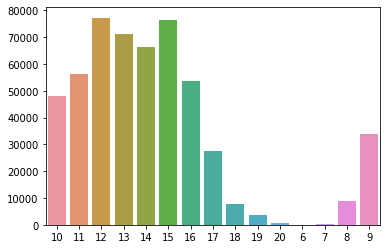

In [27]:
sns.barplot(x=orders_p_h.index.values, y=orders_p_h.values)

In [28]:
orders_p_h.index.values

array(['10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
       '6', '7', '8', '9'], dtype=object)

**How many orders (per month)?**

In [29]:
month = retail_copy['InvoiceDate'].apply(lambda x: x.split(' ')[0].split('/')[0]).unique(); month

array(['12', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'],
      dtype=object)

In [30]:
retail_copy['Month'] = retail_copy['InvoiceDate'].apply(lambda x: x.split(' ')[0].split('/')[0]); retail_copy.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Time_H,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850,United Kingdom,10,8,12
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850,United Kingdom,10,8,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850,United Kingdom,10,8,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850,United Kingdom,10,8,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850,United Kingdom,10,8,12


In [31]:
orders_p_m = retail_copy.groupby('Month').count()['InvoiceNo']; orders_p_m

Month
1     34350
10    59396
11    83498
12    66818
2     27184
3     35915
4     29171
5     36292
6     36056
7     38716
8     34564
9     49323
Name: InvoiceNo, dtype: int64

**Make a plot about number of orders per month**

In [32]:
orders_p_m.index = orders_p_m.index.astype(int)
orders_p_m = orders_p_m.sort_index()

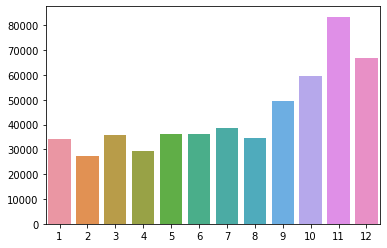

In [33]:
sns.barplot(x=orders_p_m.index.values, y=orders_p_m.values)

**Top 10 items most sales**

In [34]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850,United Kingdom


In [35]:
retail.groupby('StockCode').apply(lambda x: len(x)).sort_values(ascending=False)[0]

2270

**Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK**

In [36]:
retail.groupby('Country').apply(lambda x: x['Quantity'].sum()).drop('United Kingdom').sort_values(ascending=False).head(10)

Country
Netherlands    200937
EIRE           147447
Germany        119263
France         112104
Australia       84209
Sweden          36083
Switzerland     30630
Spain           27951
Japan           26016
Belgium         23237
dtype: int64

Almost top country have the most Quantity ordered is Europe countries.

### You are awesome!!